In [4]:
import pandas as pd

# Load the stock data
file_path = r'../raw_data\companies_historical_data.csv'
df = pd.read_csv(file_path)

# Preview the data
print(df.head())


         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits Company  
0        0.0           0.0    AAPL  
1        0.0           0.0    AAPL  
2        0.0           0.0    AAPL  
3        0.0           0.0    AAPL  
4        0.0           0.0    AAPL  


In [21]:
import pandas as pd
import pandas_ta as ta  # Import pandas_ta

# Load the stock data
file_path = r'../raw_data/companies_historical_data.csv'
df = pd.read_csv(file_path)

# Preview the raw data
print("Initial Data:")
print(df.head())

# Ensure sufficient data exists before calculating indicators
if len(df) >= 20:  # Minimum rows required for Bollinger Bands
    # Add a 14-period Simple Moving Average (SMA)
    df['SMA_14'] = ta.sma(df['Close'], length=14)
    
    # Add a 14-period Relative Strength Index (RSI)
    df['RSI_14'] = ta.rsi(df['Close'], length=14)
    
    # Add Bollinger Bands (20-period, 2 standard deviations)
    bbands = ta.bbands(df['Close'], length=20)
    df = pd.concat([df, bbands], axis=1)

    # Handle NaN values (forward fill and backward fill)
    df = df.fillna(method='ffill').fillna(method='bfill')
    
    # Save the updated data with indicators to a new CSV file
    output_path = r'../raw_data/companies_with_indicators1.csv'
    df.to_csv(output_path, index=False, na_rep='0')  # Replace remaining NaN with 0 in output
    
    # Display the updated DataFrame
    print("\nUpdated Data with Indicators:")
    print(df.head())
else:
    print("Not enough rows to compute technical indicators. A minimum of 20 rows is required.")



Initial Data:
         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits Company  
0        0.0           0.0    AAPL  
1        0.0           0.0    AAPL  
2        0.0           0.0    AAPL  
3        0.0           0.0    AAPL  
4        0.0           0.0    AAPL  


C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\488472829.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')



Updated Data with Indicators:
         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits Company    SMA_14    RSI_14  BBL_20_2.0  \
0        0.0           0.0    AAPL  0.137197  64.73548    0.110044   
1        0.0           0.0    AAPL  0.137197  64.73548    0.110044   
2        0.0           0.0    AAPL  0.137197  64.73548    0.110044   
3        0.0           0.0    AAPL  0.137197  64.73548    0.110044   
4        0.0           0.0    AAPL  0.137197  64.73548    0.110044   

   BBM_20_2.0  BBU_20_2.0  BBB_20_2.0  BBP_20_2.0  
0    0.138588    0.16

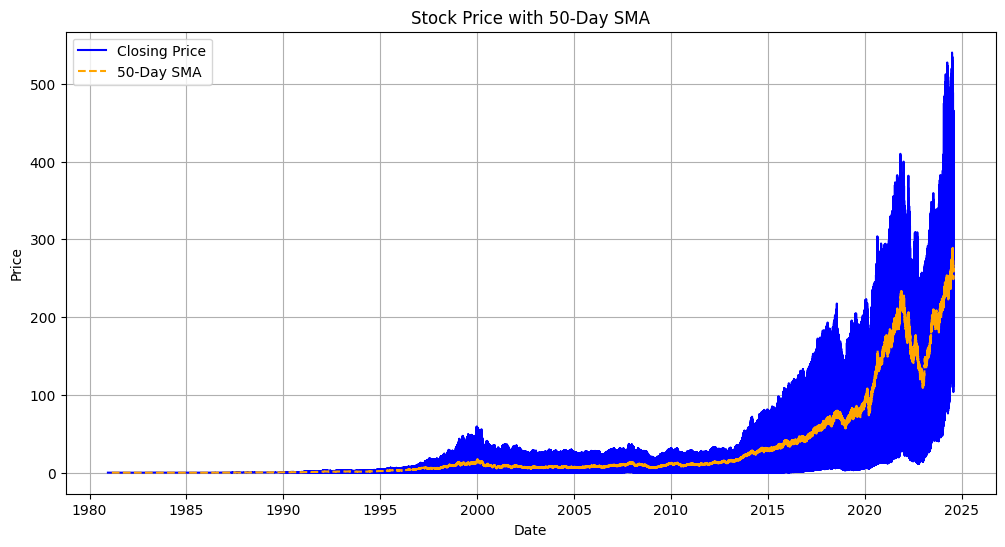

In [7]:
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt

# Load the stock data
file_path = r'../raw_data/companies_historical_data.csv'
df = pd.read_csv(file_path)

#
df['Date'] = pd.to_datetime(df['Date']) 
df.sort_values('Date', inplace=True)

# Add a Simple Moving Average (SMA) indicator
df['SMA_50'] = ta.sma(df['Close'], length=50) 

# Plot the closing prices and SMA
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.plot(df['Date'], df['SMA_50'], label='50-Day SMA', color='orange', linestyle='--')

# Add titles and labels
plt.title('Stock Price with 50-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


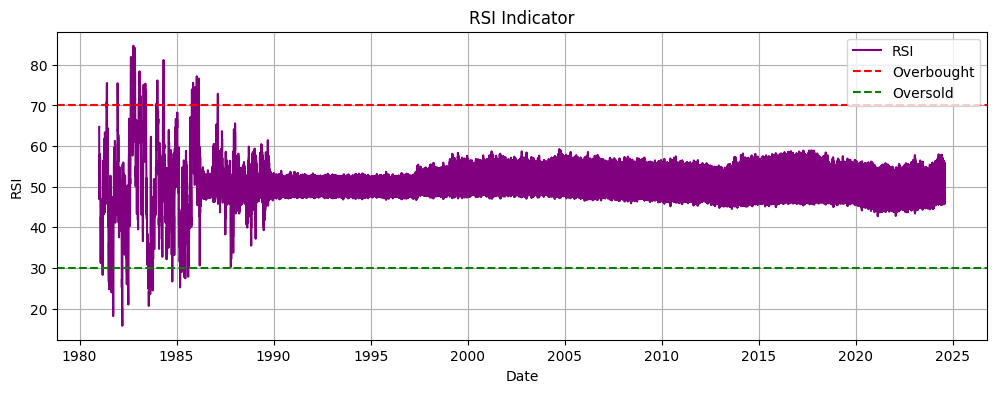

In [6]:
# Add RSI (Relative Strength Index)
df['RSI'] = ta.rsi(df['Close'], length=14)

# Plot RSI
plt.figure(figsize=(12, 4))
plt.plot(df['Date'], df['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('RSI Indicator')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\1589652817.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['SMA_50'] = ta.sma(df_company['Close'], length=50)  # Replace 'Close' with your column name


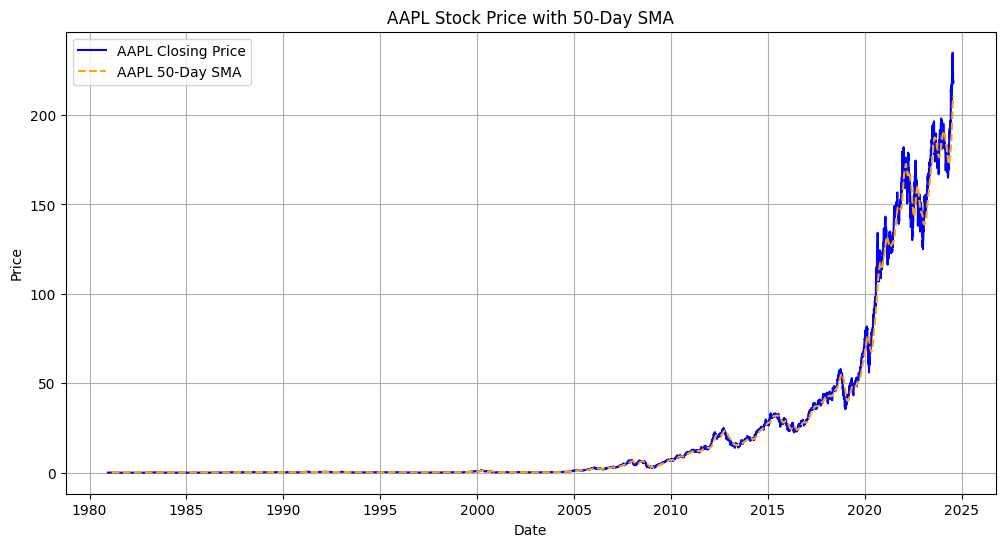

In [8]:
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt

# Load the stock data
file_path = r'../raw_data/companies_historical_data.csv'
df = pd.read_csv(file_path)

# Ensure the data has a 'Date' column and is sorted
df['Date'] = pd.to_datetime(df['Date'])  
df.sort_values('Date', inplace=True)

# Filter data for a specific company
company_name = "AAPL"  # Replace with the company you want to analyze
df_company = df[df['Company'] == company_name]  # Replace 'Company' with your actual column name

# Add a Simple Moving Average (SMA) indicator for the company
df_company['SMA_50'] = ta.sma(df_company['Close'], length=50)  
# Plot the company's closing prices and SMA
plt.figure(figsize=(12, 6))
plt.plot(df_company['Date'], df_company['Close'], label=f'{company_name} Closing Price', color='blue')
plt.plot(df_company['Date'], df_company['SMA_50'], label=f'{company_name} 50-Day SMA', color='orange', linestyle='--')

# Add titles and labels
plt.title(f'{company_name} Stock Price with 50-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\166542702.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['SMA_50'] = ta.sma(df_company['Close'], length=50)  # Replace 'Close' with your column name


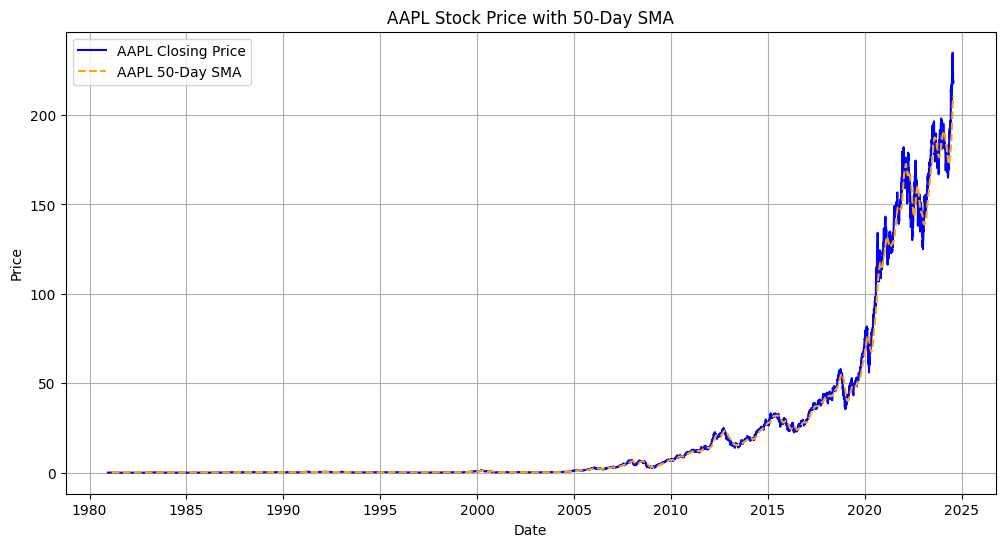

C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\166542702.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['SMA_50'] = ta.sma(df_company['Close'], length=50)  # Replace 'Close' with your column name


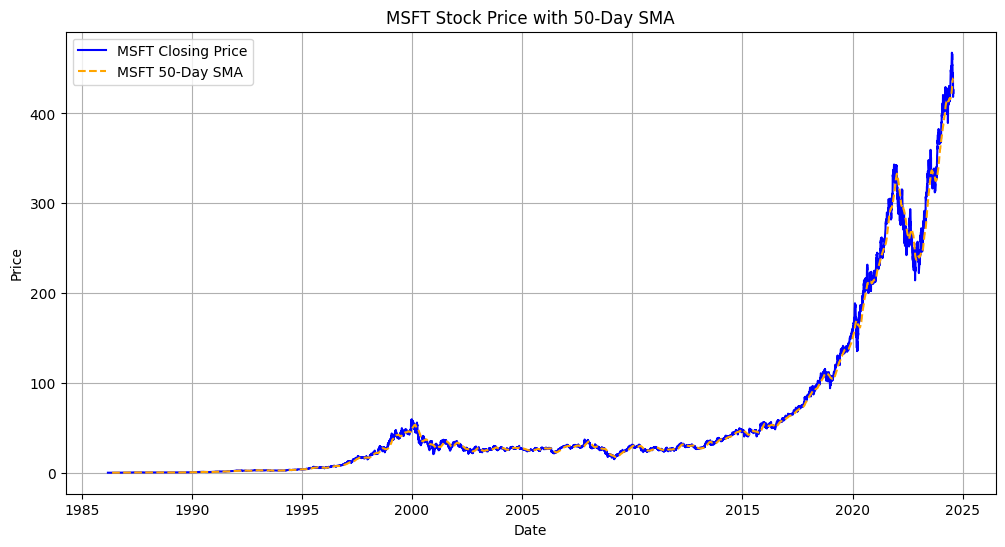

C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\166542702.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['SMA_50'] = ta.sma(df_company['Close'], length=50)  # Replace 'Close' with your column name


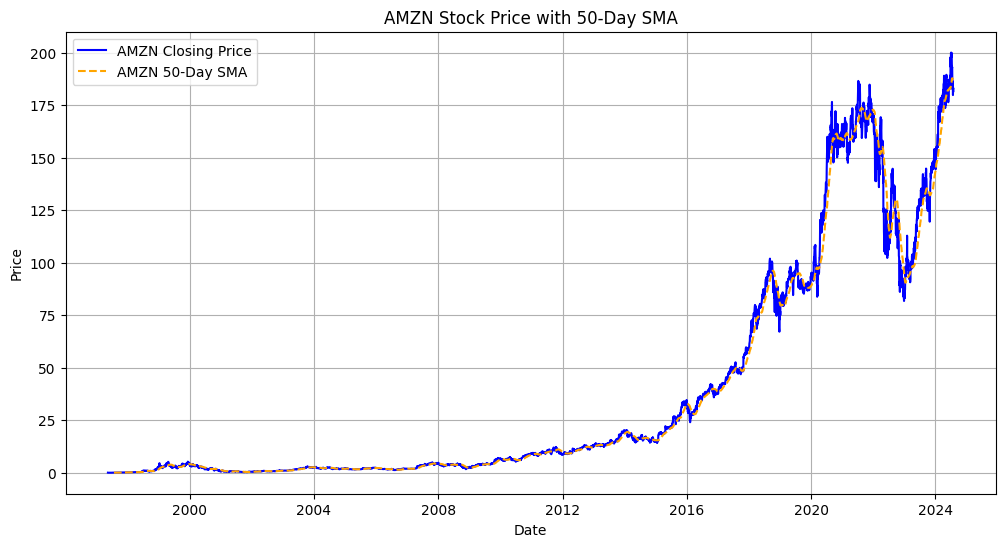

C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\166542702.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['SMA_50'] = ta.sma(df_company['Close'], length=50)  # Replace 'Close' with your column name


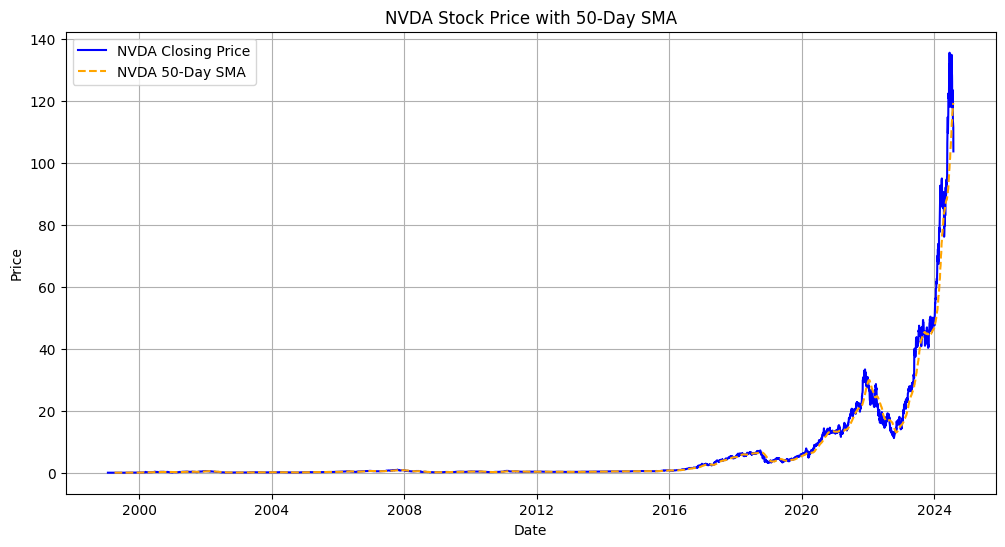

C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\166542702.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['SMA_50'] = ta.sma(df_company['Close'], length=50)  # Replace 'Close' with your column name


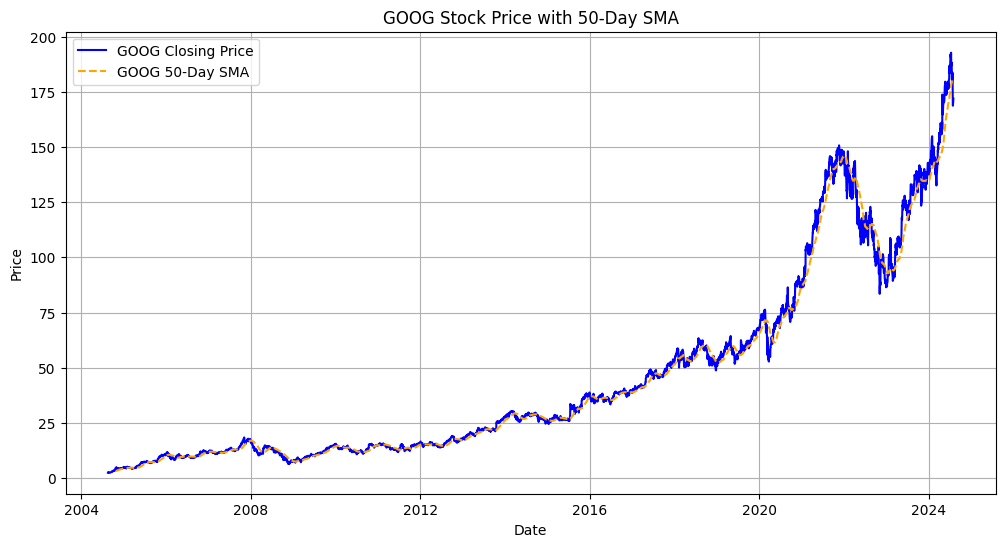

C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\166542702.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['SMA_50'] = ta.sma(df_company['Close'], length=50)  # Replace 'Close' with your column name


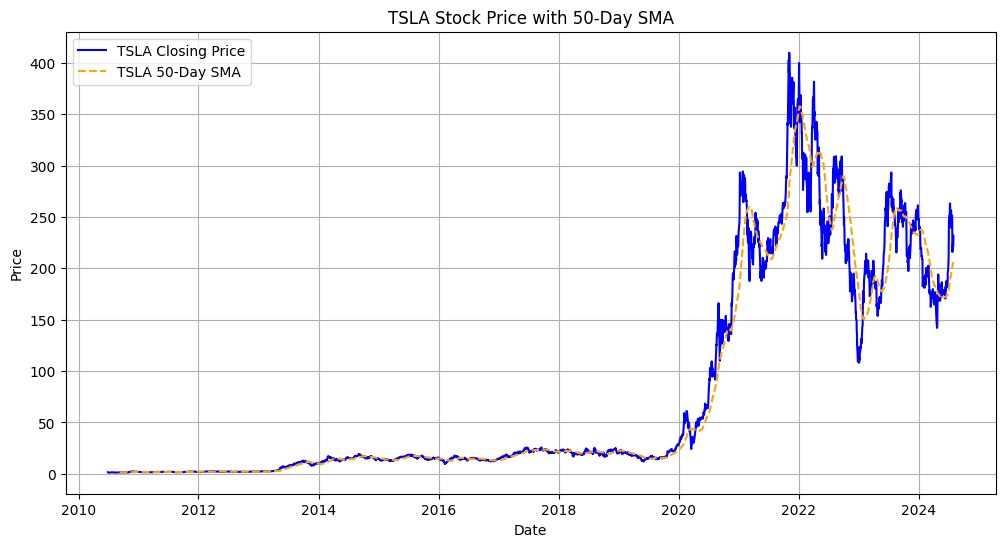

C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\166542702.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['SMA_50'] = ta.sma(df_company['Close'], length=50)  # Replace 'Close' with your column name


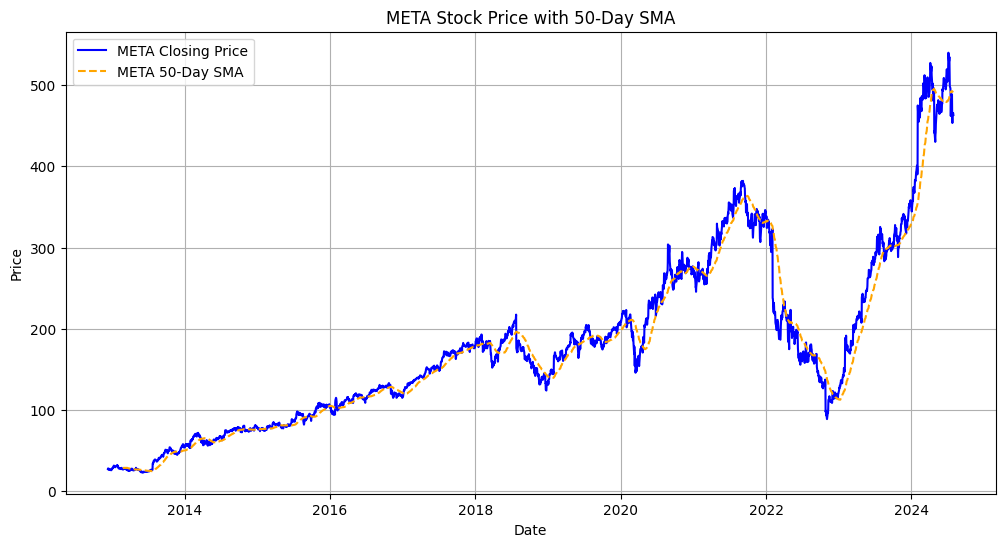

In [9]:
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt

# Load the stock data
file_path = r'../raw_data/companies_historical_data.csv'
df = pd.read_csv(file_path)

# Ensure the data has a 'Date' column and is sorted
df['Date'] = pd.to_datetime(df['Date'])  
df.sort_values('Date', inplace=True)

# Get the unique companies from the dataset
company_column = 'Company'  
companies = df[company_column].unique()

# Iterate over each company
for company in companies:
    # Filter data for the current company
    df_company = df[df[company_column] == company]
    
    # Calculate indicators (SMA as an example, add more if needed)
    df_company['SMA_50'] = ta.sma(df_company['Close'], length=50)  
    
    # Create a plot for the company
    plt.figure(figsize=(12, 6))
    plt.plot(df_company['Date'], df_company['Close'], label=f'{company} Closing Price', color='blue')
    plt.plot(df_company['Date'], df_company['SMA_50'], label=f'{company} 50-Day SMA', color='orange', linestyle='--')
    
    # Add titles and labels
    plt.title(f'{company} Stock Price with 50-Day SMA')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()


C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\2370345670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['SMA_50'] = ta.sma(df_company['Close'], length=50)
C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\2370345670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['RSI'] = ta.rsi(df_company['Close'], length=14)


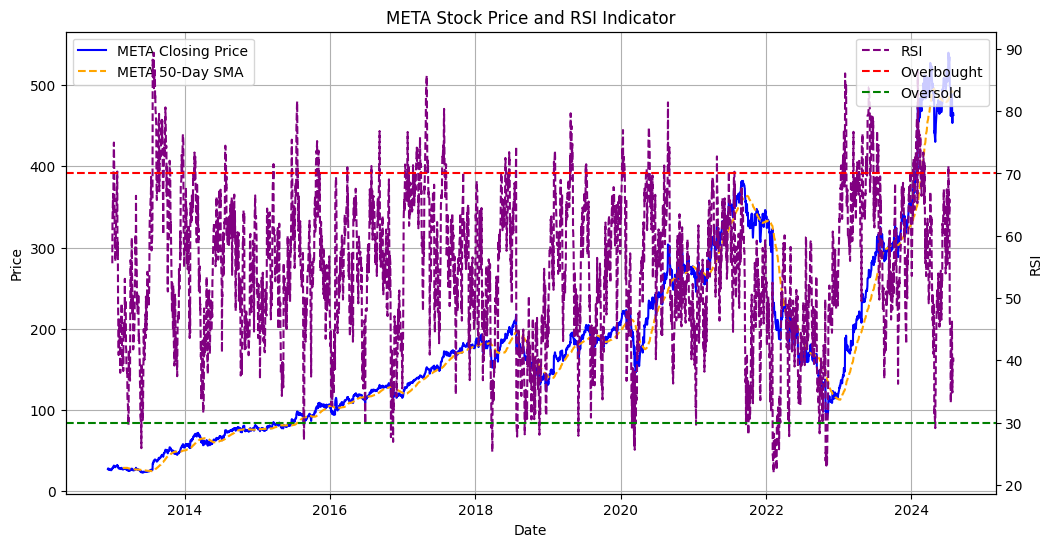

In [10]:
    # Calculate SMA and RSI
df_company['SMA_50'] = ta.sma(df_company['Close'], length=50)
df_company['RSI'] = ta.rsi(df_company['Close'], length=14)

    # Create a plot with both SMA and RSI
fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot Closing Prices and SMA
ax1.plot(df_company['Date'], df_company['Close'], label=f'{company} Closing Price', color='blue')
ax1.plot(df_company['Date'], df_company['SMA_50'], label=f'{company} 50-Day SMA', color='orange', linestyle='--')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot RSI on a secondary axis
ax2 = ax1.twinx()
ax2.plot(df_company['Date'], df_company['RSI'], label='RSI', color='purple', linestyle='--')
ax2.axhline(70, color='red', linestyle='--', label='Overbought')
ax2.axhline(30, color='green', linestyle='--', label='Oversold')
ax2.set_ylabel('RSI')
ax2.legend(loc='upper right')

# Title
plt.title(f'{company} Stock Price and RSI Indicator')
plt.show()


C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\1250313791.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['SMA_50'] = ta.sma(df_company['Close'], length=50)  # 50-day SMA
C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\1250313791.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['SMA_200'] = ta.sma(df_company['Close'], length=200)  # 200-day SMA
C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\1250313791.py:25: SettingWithCopyWarning: 
A value is trying to be set on a cop

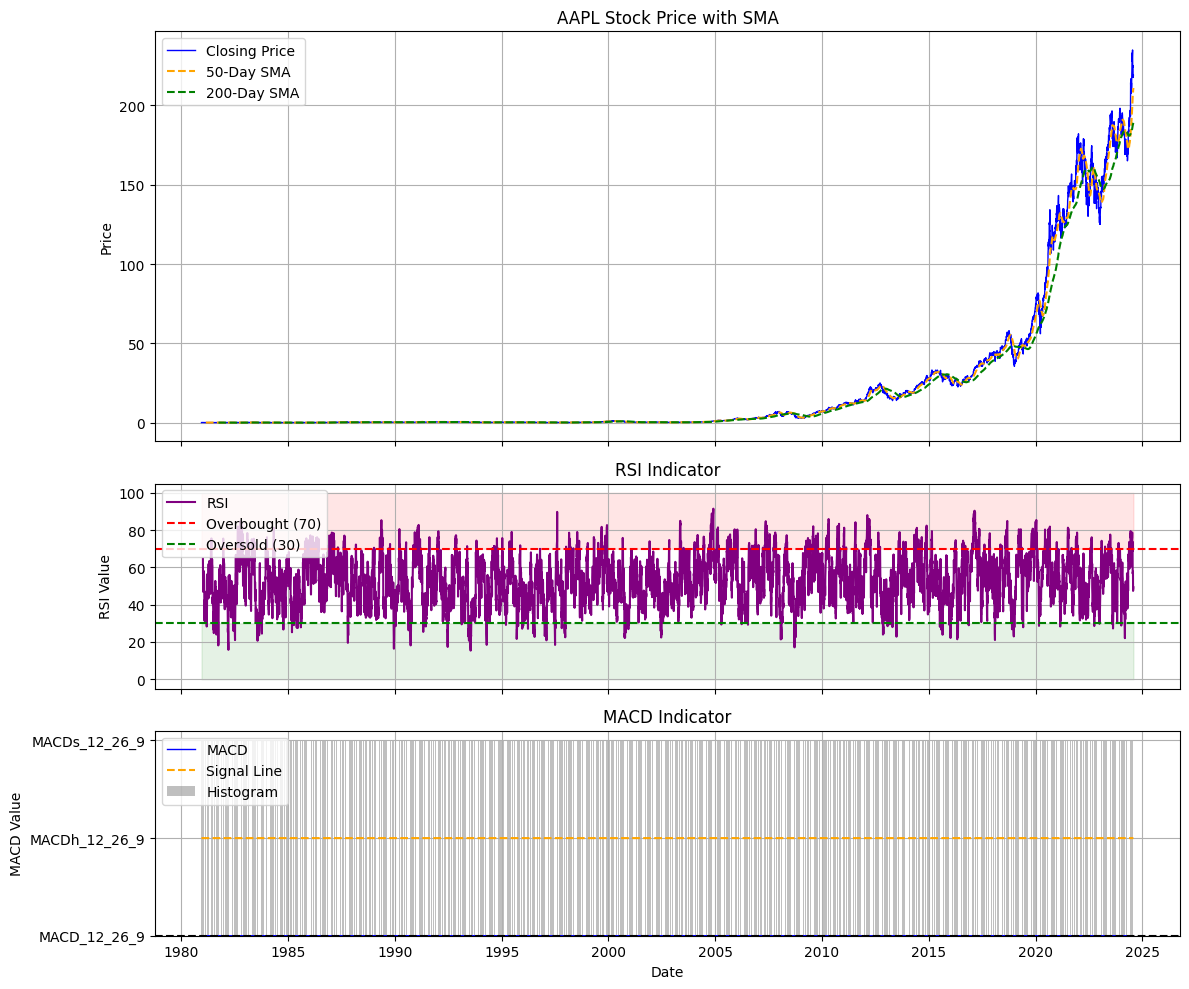

C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\1250313791.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['SMA_50'] = ta.sma(df_company['Close'], length=50)  # 50-day SMA
C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\1250313791.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['SMA_200'] = ta.sma(df_company['Close'], length=200)  # 200-day SMA
C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\1250313791.py:25: SettingWithCopyWarning: 
A value is trying to be set on a cop

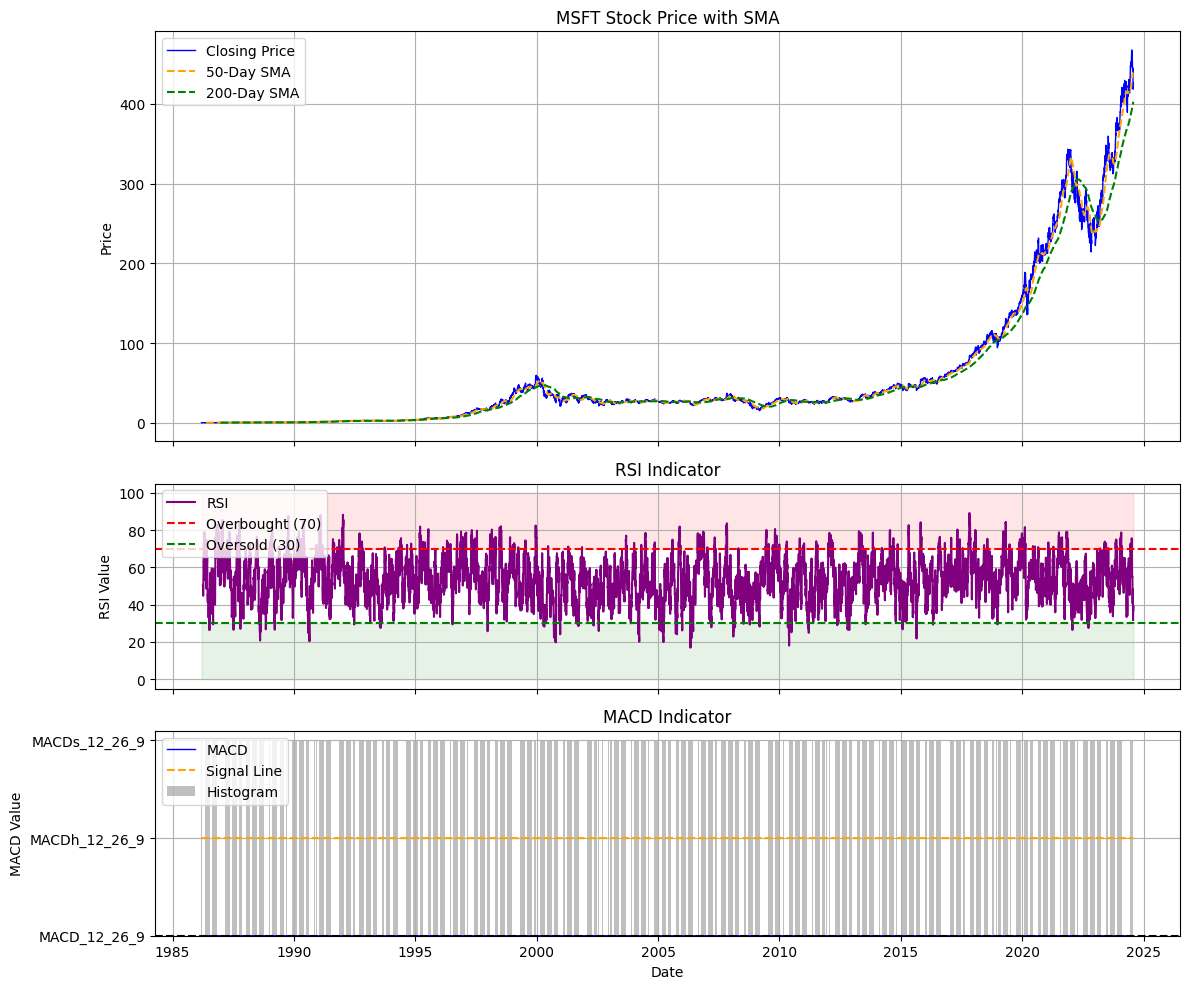

C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\1250313791.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['SMA_50'] = ta.sma(df_company['Close'], length=50)  # 50-day SMA
C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\1250313791.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['SMA_200'] = ta.sma(df_company['Close'], length=200)  # 200-day SMA
C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\1250313791.py:25: SettingWithCopyWarning: 
A value is trying to be set on a cop

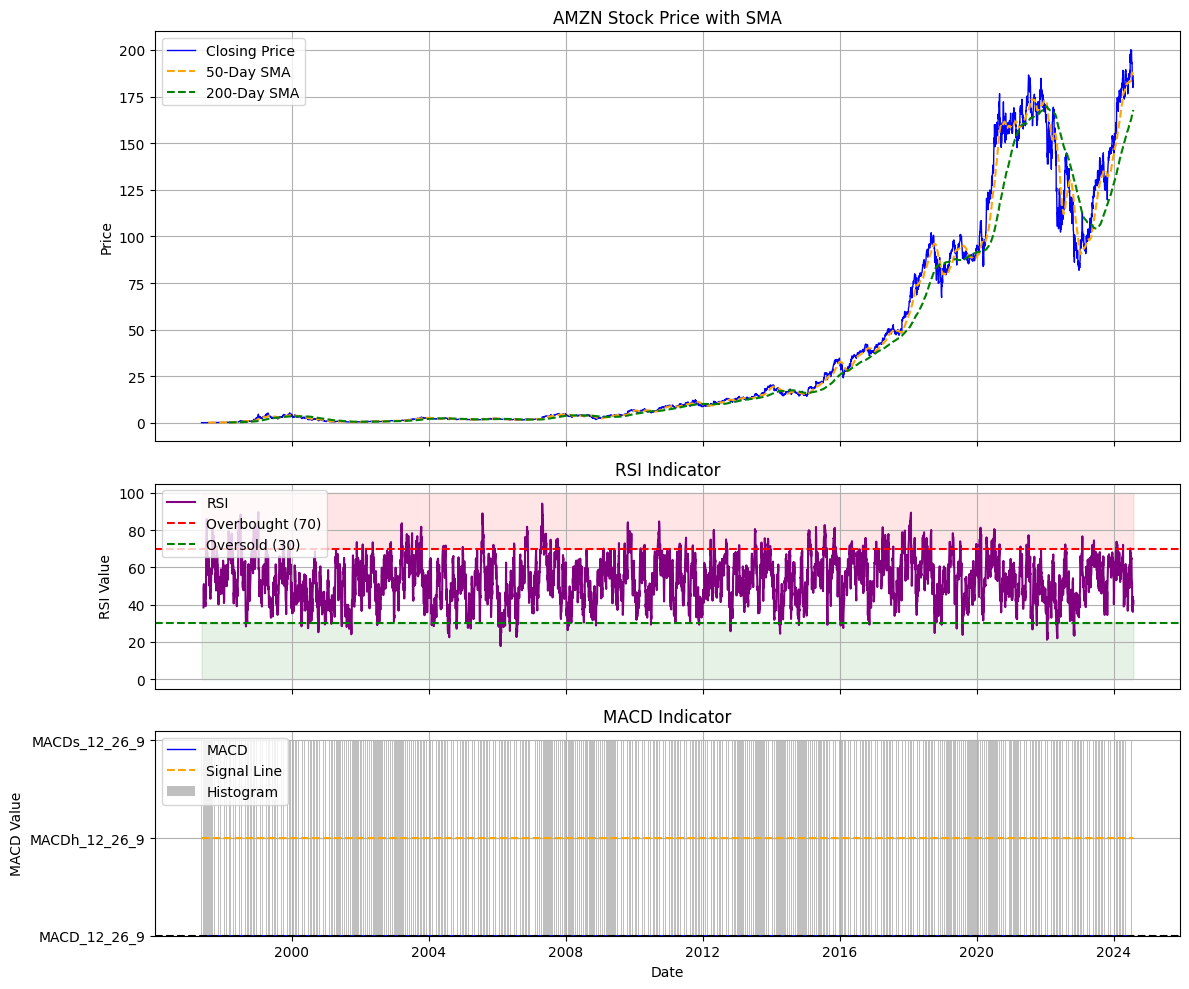

C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\1250313791.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['SMA_50'] = ta.sma(df_company['Close'], length=50)  # 50-day SMA
C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\1250313791.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['SMA_200'] = ta.sma(df_company['Close'], length=200)  # 200-day SMA
C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\1250313791.py:25: SettingWithCopyWarning: 
A value is trying to be set on a cop

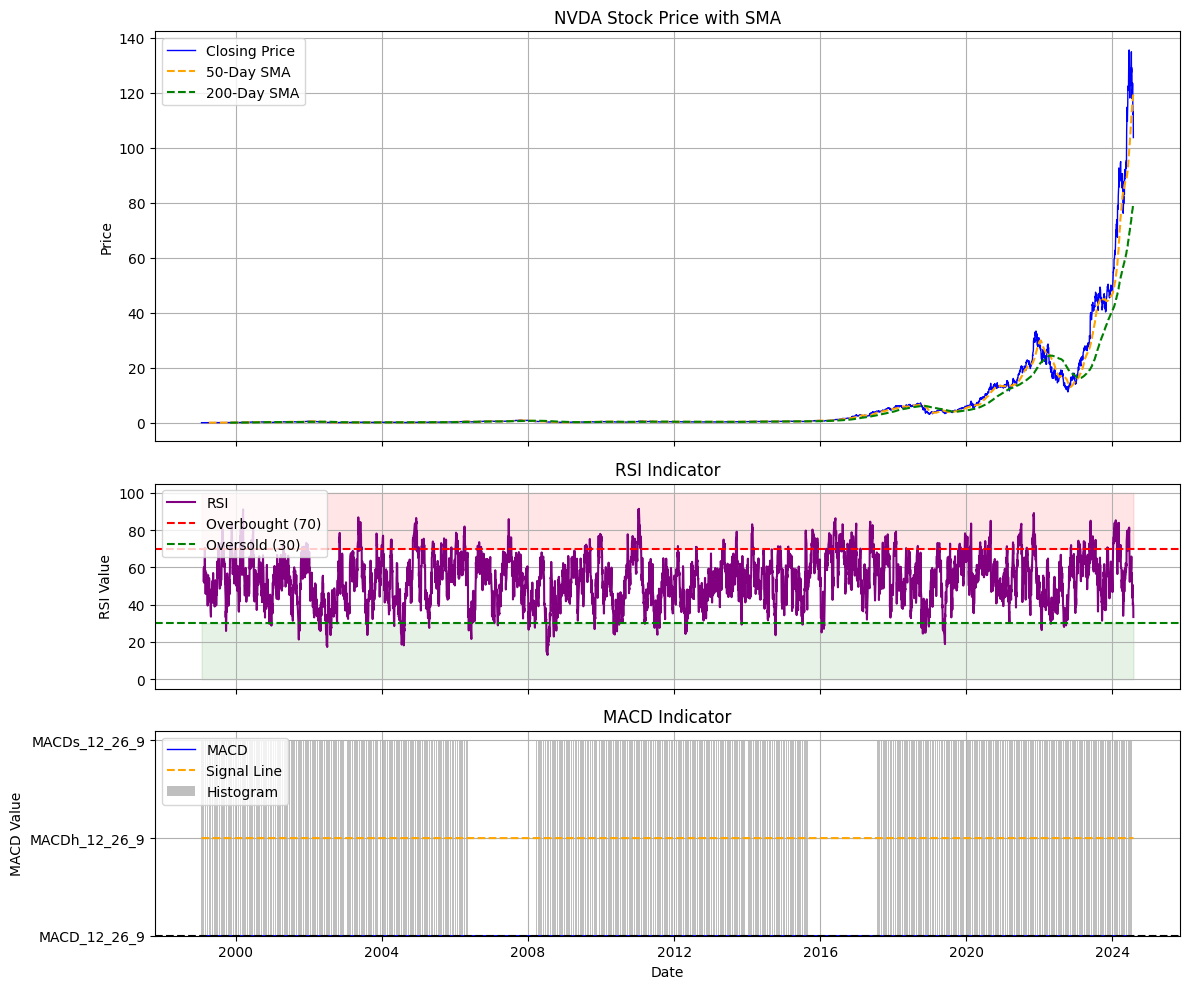

C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\1250313791.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['SMA_50'] = ta.sma(df_company['Close'], length=50)  # 50-day SMA
C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\1250313791.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['SMA_200'] = ta.sma(df_company['Close'], length=200)  # 200-day SMA
C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\1250313791.py:25: SettingWithCopyWarning: 
A value is trying to be set on a cop

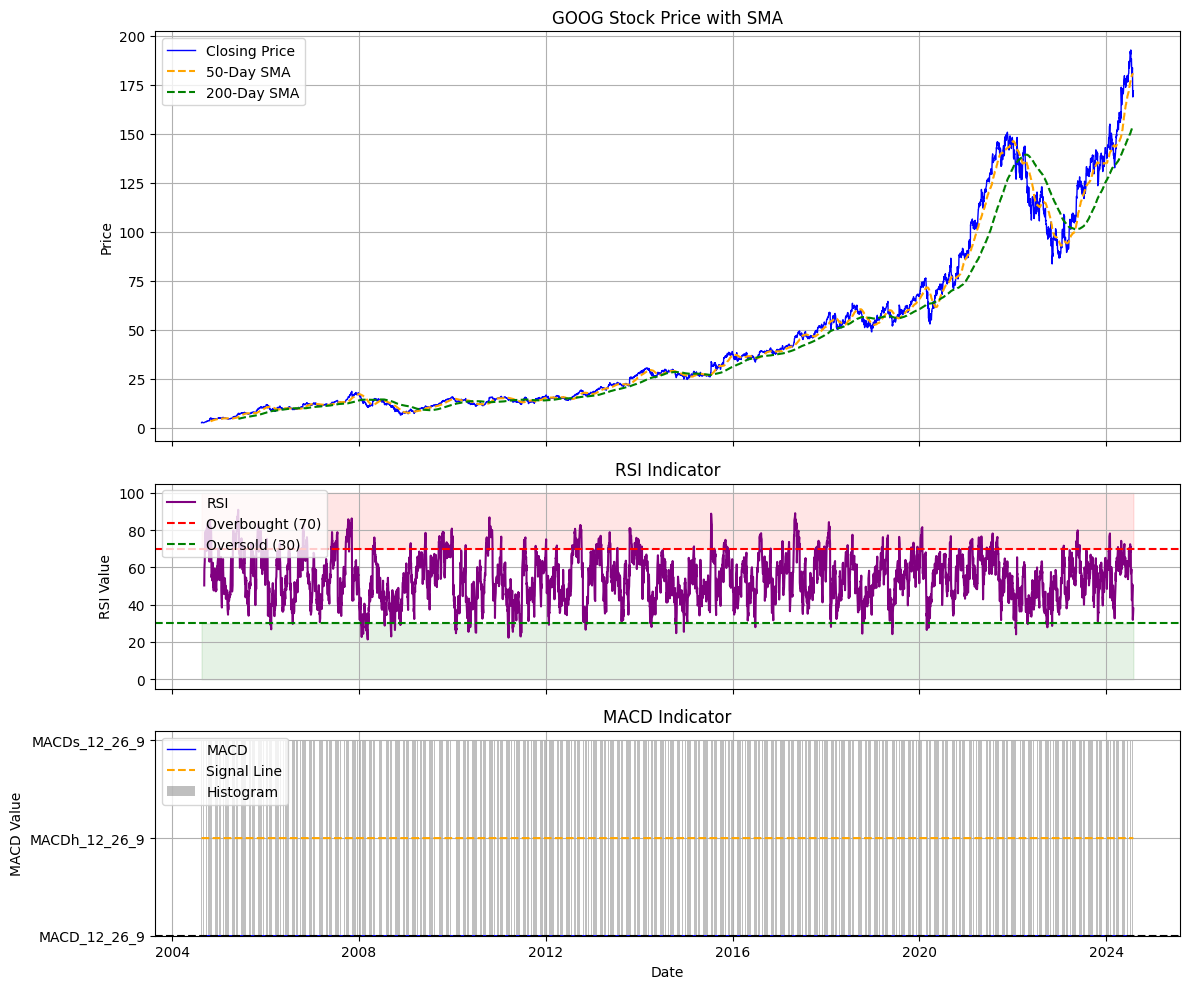

C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\1250313791.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['SMA_50'] = ta.sma(df_company['Close'], length=50)  # 50-day SMA
C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\1250313791.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['SMA_200'] = ta.sma(df_company['Close'], length=200)  # 200-day SMA
C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\1250313791.py:25: SettingWithCopyWarning: 
A value is trying to be set on a cop

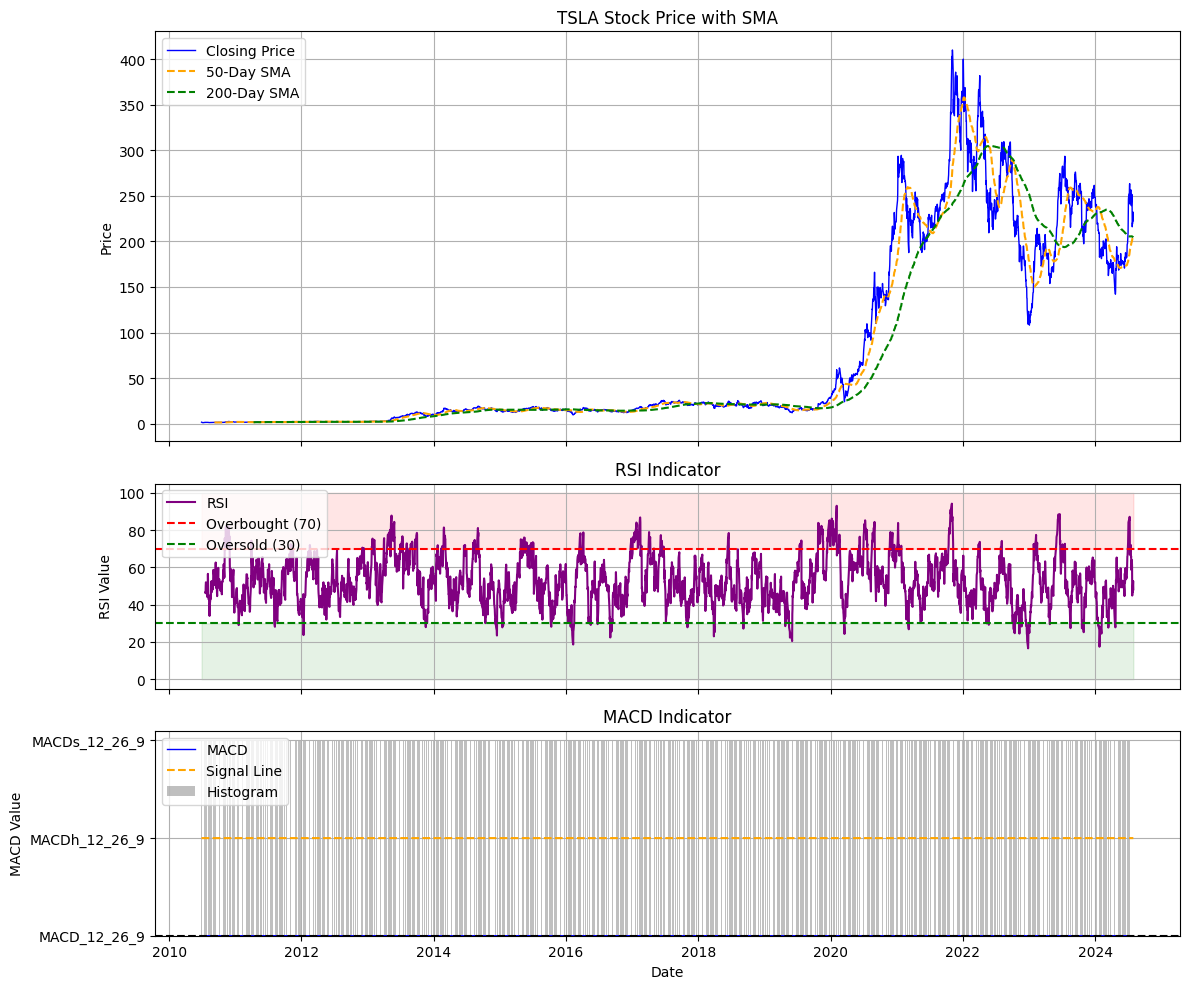

C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\1250313791.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['SMA_50'] = ta.sma(df_company['Close'], length=50)  # 50-day SMA
C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\1250313791.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['SMA_200'] = ta.sma(df_company['Close'], length=200)  # 200-day SMA
C:\Users\ufanc\AppData\Local\Temp\ipykernel_33984\1250313791.py:25: SettingWithCopyWarning: 
A value is trying to be set on a cop

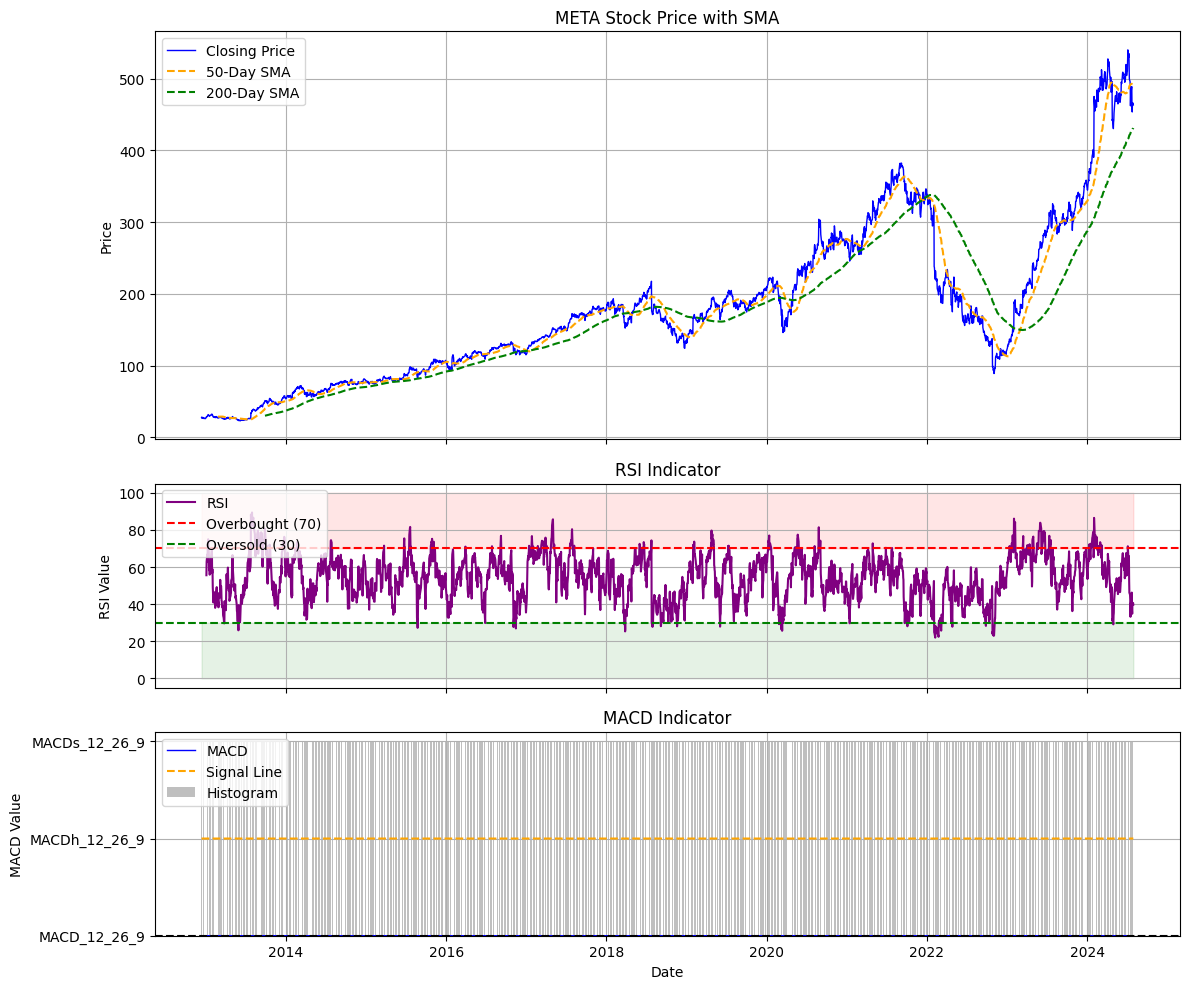

In [20]:
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt

# Load the stock data
file_path = r'../raw_data/companies_historical_data.csv'
df = pd.read_csv(file_path)

# Ensure the data has a 'Date' column and is sorted
df['Date'] = pd.to_datetime(df['Date'])  # Replace 'Date' with your actual date column name
df.sort_values('Date', inplace=True)

# Get the unique companies from the dataset
company_column = 'Company'  # Replace with your column name for companies
companies = df[company_column].unique()

# Iterate over each company
for company in companies:
    # Filter data for the current company
    df_company = df[df[company_column] == company]
    
    # Calculate indicators
    df_company['SMA_50'] = ta.sma(df_company['Close'], length=50)  # 50-day SMA
    df_company['SMA_200'] = ta.sma(df_company['Close'], length=200)  # 200-day SMA
    df_company['RSI'] = ta.rsi(df_company['Close'], length=14)  # RSI (14)
    df_company['MACD'], df_company['Signal'], df_company['Histogram'] = ta.macd(df_company['Close'], fast=12, slow=26, signal=9)  # MACD

    # Create the figure and axes
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), sharex=True, gridspec_kw={'height_ratios': [2, 1, 1]})

    # --- Plot 1: Price with SMA ---
    ax1.plot(df_company['Date'], df_company['Close'], label='Closing Price', color='blue', linewidth=1)
    ax1.plot(df_company['Date'], df_company['SMA_50'], label='50-Day SMA', color='orange', linestyle='--')
    ax1.plot(df_company['Date'], df_company['SMA_200'], label='200-Day SMA', color='green', linestyle='--')
    ax1.set_title(f'{company} Stock Price with SMA')
    ax1.set_ylabel('Price')
    ax1.legend(loc='upper left')
    ax1.grid()

    # --- Plot 2: RSI ---
    ax2.plot(df_company['Date'], df_company['RSI'], label='RSI', color='purple')
    ax2.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    ax2.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    ax2.fill_between(df_company['Date'], 70, 100, color='red', alpha=0.1)
    ax2.fill_between(df_company['Date'], 0, 30, color='green', alpha=0.1)
    ax2.set_title('RSI Indicator')
    ax2.set_ylabel('RSI Value')
    ax2.legend(loc='upper left')
    ax2.grid()

    # --- Plot 3: MACD ---
    ax3.plot(df_company['Date'], df_company['MACD'], label='MACD', color='blue', linewidth=1)
    ax3.plot(df_company['Date'], df_company['Signal'], label='Signal Line', color='orange', linestyle='--')
    ax3.bar(df_company['Date'], df_company['Histogram'], label='Histogram', color='grey', alpha=0.5)
    ax3.axhline(0, color='black', linestyle='--')
    ax3.set_title('MACD Indicator')
    ax3.set_ylabel('MACD Value')
    ax3.legend(loc='upper left')
    ax3.grid()

    # Finalize plot
    plt.xlabel('Date')
    plt.tight_layout()
    plt.show()


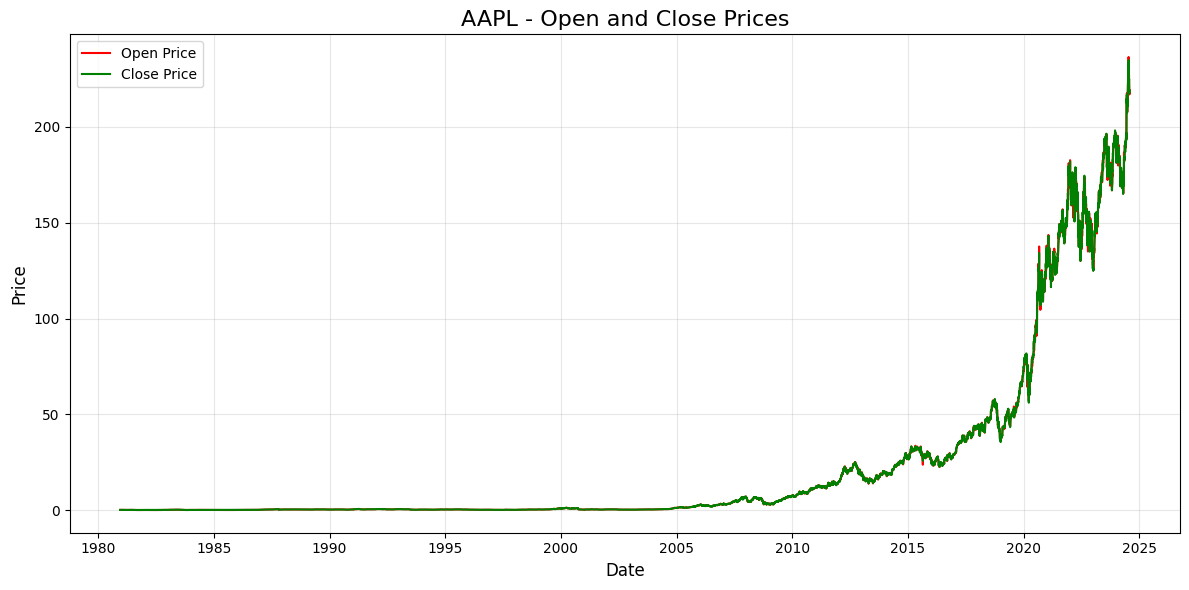

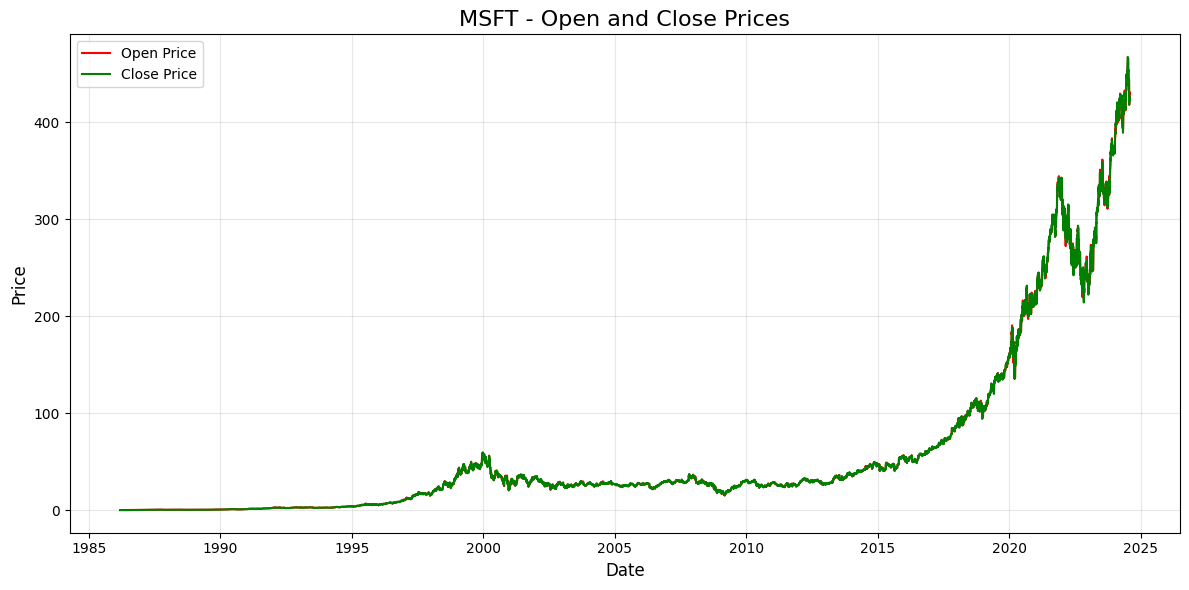

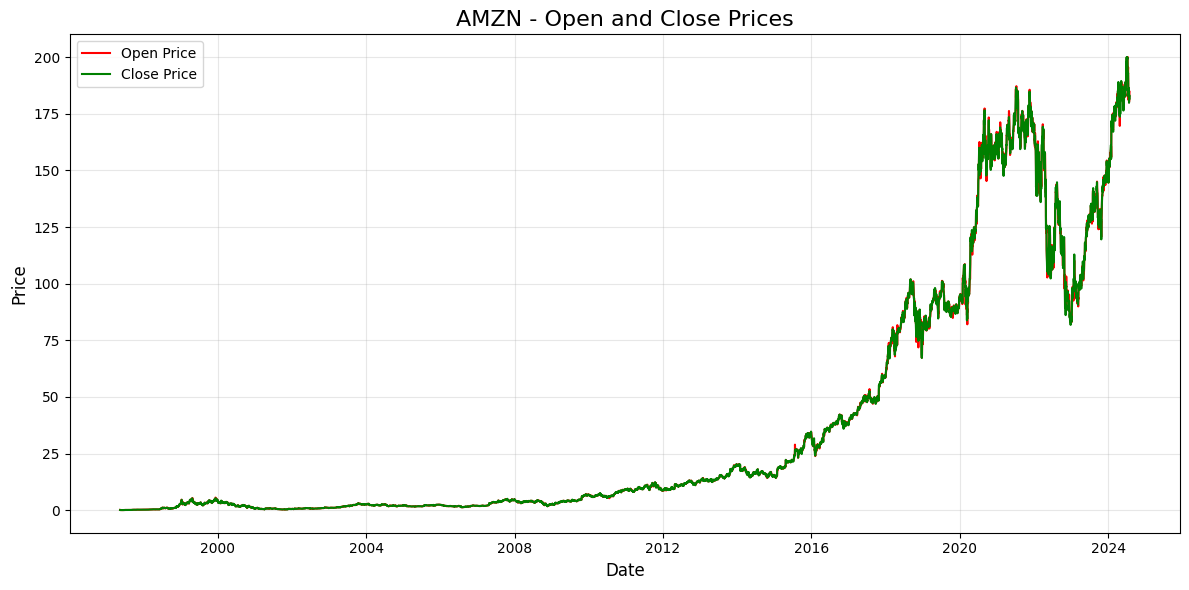

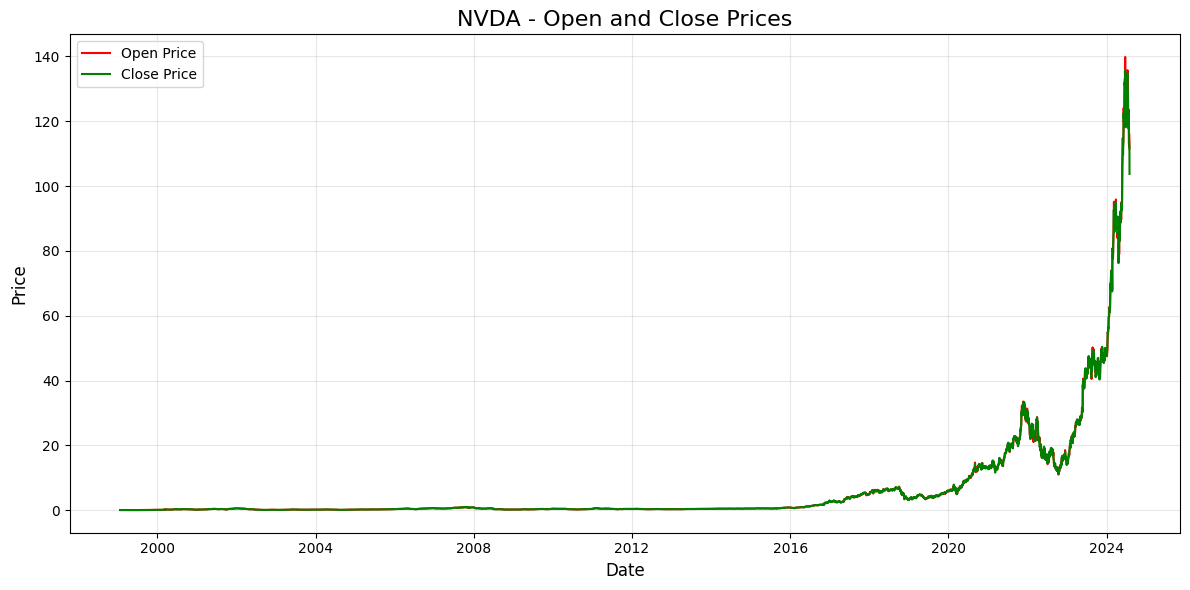

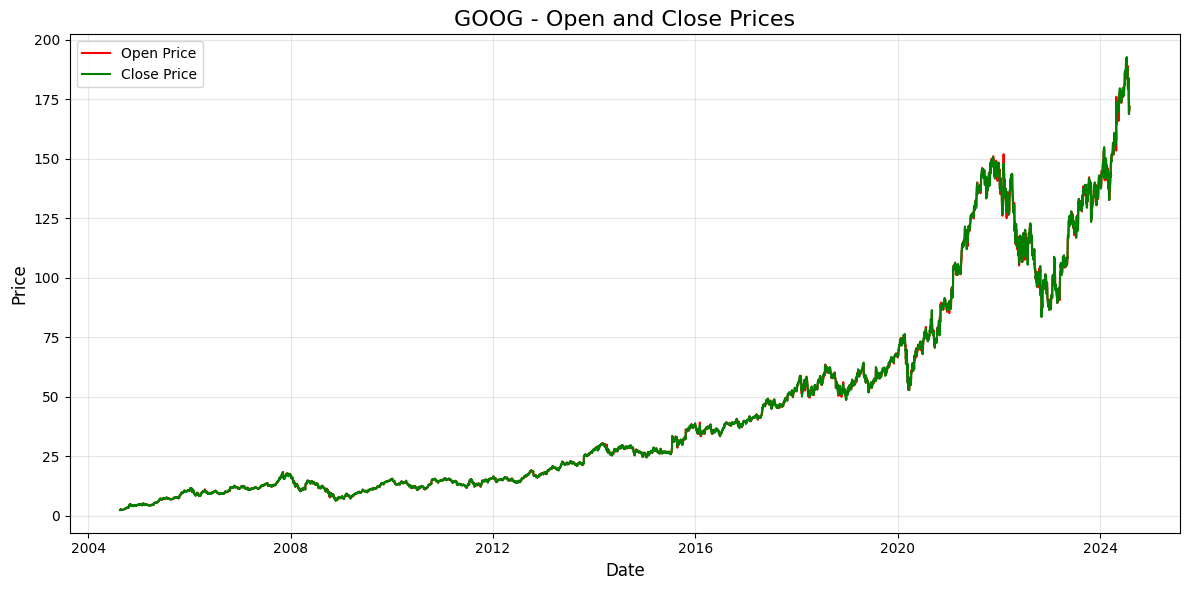

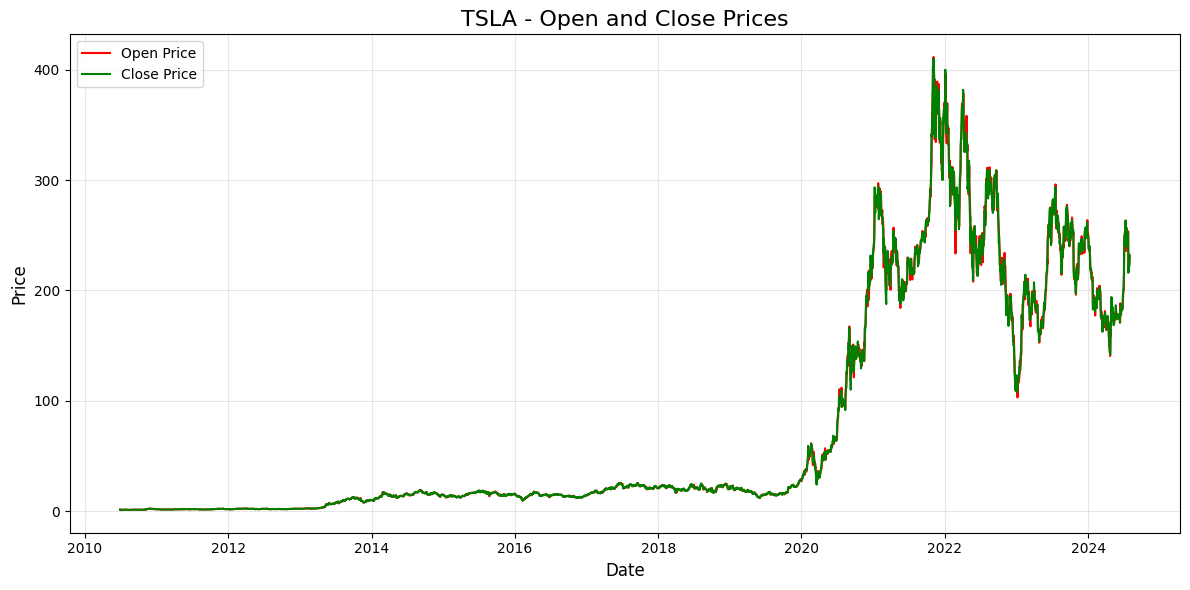

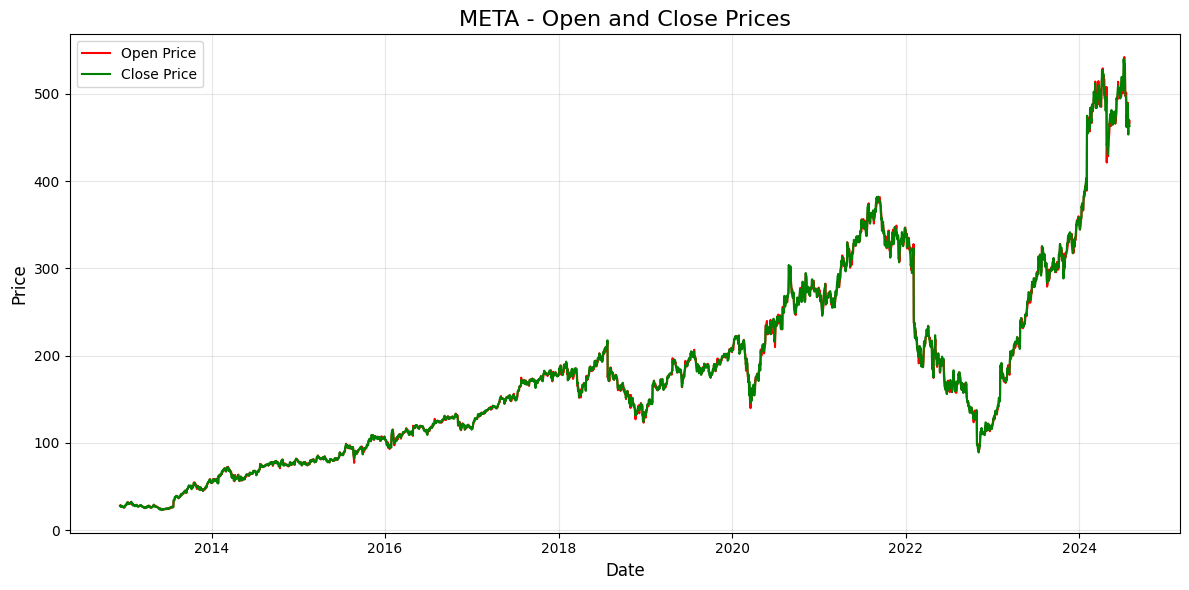

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the stock data
file_path = r'../raw_data/companies_historical_data.csv'
df = pd.read_csv(file_path)

# Ensure the data has a 'Date' column and is sorted
df['Date'] = pd.to_datetime(df['Date'])  
df.sort_values('Date', inplace=True)

# Get the unique companies from the dataset
company_column = 'Company'  
companies = df[company_column].unique()

# Iterate over each company
for company in companies:
    # Filter data for the current company
    df_company = df[df[company_column] == company]

    # Plot Open and Close prices
    plt.figure(figsize=(12, 6))
    plt.plot(df_company['Date'], df_company['Open'], label='Open Price', color='red', linewidth=1.5)
    plt.plot(df_company['Date'], df_company['Close'], label='Close Price', color='green', linewidth=1.5)

    # Add titles and labels
    plt.title(f'{company} - Open and Close Prices', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.legend(loc='upper left')
    plt.grid(alpha=0.3)

    # Display the plot
    plt.tight_layout()
    plt.show()
